<font size="4" style="color:red;"> **IMPORTANT: ** When submitting this notebook as homework, make sure you Only modify cells which have the following comment</font>

```python
# modify this cell
```

<font style="color:red;"> Do not add any new cells when submitting homework. To test out new code, use the coding **scratchpad** by clicking the triangular icon in the bottom right corner of the screen. (**hotkey:** control-B)  </font>

In [2]:
%pylab inline
from scipy import *

Populating the interactive namespace from numpy and matplotlib


# Linear Algebra Review

[Read this notebook](http://70.95.166.175:8888/notebooks/SAFETY/probability-and-statistics-using-python/notebooks/Week%209-%20RegressionPCA/1.Linear%20Algebra%20Review.ipynb) 
before attempting exercises in this section.

### Helper Code

In [36]:
from numpy.linalg import norm
from math import sqrt,sin,cos
import pandas as pd
import numpy as np
from numpy import arange,array,ones,linalg

In [19]:
import matplotlib.pyplot as plt
from numpy.linalg import norm
text_loc=1.1
def plot_arrows(L,scale=4,text_loc=0.2,fontsize=12):
    """ Plot a list of arrows. Each arrow defined by start and end points and a color and optionally text"""
    plt.figure(figsize=[6,6])
    plt.xlim([-scale,scale])
    plt.ylim([-scale,scale])
    ax = plt.axes()
    plt.xlabel('1st coord (x)')
    plt.ylabel('2nd coord (y)')
    #ax.axis('equal')

    for A in L:
        s,e,c=A[:3]
        ax.arrow(s[0], s[1], e[0], e[1], head_width=0.05*scale, head_length=0.1*scale, fc=c, ec=c,length_includes_head=True);
        if len(A)==4:
            t=A[3]
            _loc=1+text_loc/norm(e)
            ax.text(_loc*e[0],_loc*e[1],t,fontsize=fontsize)
    plt.grid()
    return ax
zero=np.array([0,0])

### Excercise 1

Let $\vec{v} \in R^2$ be a vector created using numpy. Your task is to write two functions, **project_e1** and **project_e2**. The functions should take $\vec{v}$ as an input and should then output the projection of $\vec{v}$ onto the corresponding vector in the standard basis.

 
<font  style="color:blue"> * **Code:** *</font>
```python
v = np.array([-2,4])
print v
print project_e1(v)
print project_e2(v)
print type( project_e2(v) )
```


<font  style="color:magenta"> * **Output:** *</font>
```
[-2  4]
[-2  0]
[0 4]
<type 'numpy.ndarray'>
```

$x_3$

In [20]:
# modify this cell

def project_e1(v):
    # input: v is a 2D numpy.array 
    # output: return the projection of v onto [1,0]
    
    ### BEGIN SOLUTION
    return np.array([1,0])*np.dot(v,[1,0])
    ### END SOLUTION

In [21]:
# modify this cell

def project_e2(v):
    # input: v is a 2D numpy.array 
    # output: return the projection of v onto [0,1]
    
    ### BEGIN SOLUTION
    return np.array([0,1])*np.dot(v,[0,1])
    ### END SOLUTION

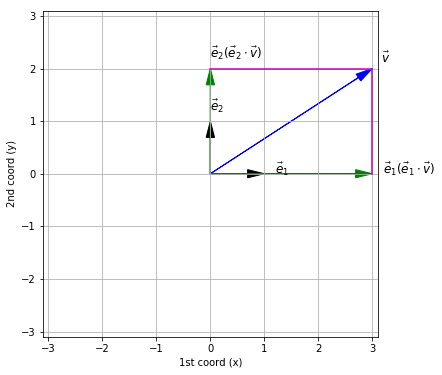

In [22]:
v = np.array([3,2])
assert type(project_e1(v)) == type(np.array([3,0]))
assert sum(abs( project_e1(v) - np.array([3,0]) )) < 10**-6
assert sum(abs( project_e2(v) - np.array([0,2]) )) < 10**-6

e1=np.array([1,0])
e2=np.array([0,1])
p1= project_e1(v)
p2= project_e2(v)
ax=plot_arrows([[zero,e1,'k','$\\vec{e}_1$'],[zero,e2,'k','$\\vec{e}_2$'],\
               [zero,v,'b','$\\vec{v}$'],\
               [zero,p1,'g',"$\\vec{e}_1(\\vec{e}_1\\cdot \\vec{v})$"],\
               [zero,p2,'g',"$\\vec{e}_2(\\vec{e}_2\\cdot \\vec{v})$"]],\
               scale=3.1,text_loc=0.2)
ax.plot([v[0],p1[0]],[v[1],p1[1]],'m');
ax.plot([v[0],p2[0]],[v[1],p2[1]],'m');

### BEGIN HIDDEN TESTS
v = np.array([5,-2])
assert sum(abs( project_e1(v) - np.array([5,0]) )) < 10**-6
assert sum(abs( project_e2(v) - np.array([0,-2]) )) < 10**-6
### END HIDDEN TESTS

### Excercise 2

Below we see that 
$\vec{u_1}=\pmatrix{\frac{1}{\sqrt{2}}\  ,\frac{1}{\sqrt{2}}}$ 
and 
$\vec{u_2}=\pmatrix{\frac{1}{\sqrt{2}}\  ,\frac{-1}{\sqrt{2}}}$ 
also form an orthonormal basis in $R^2$.

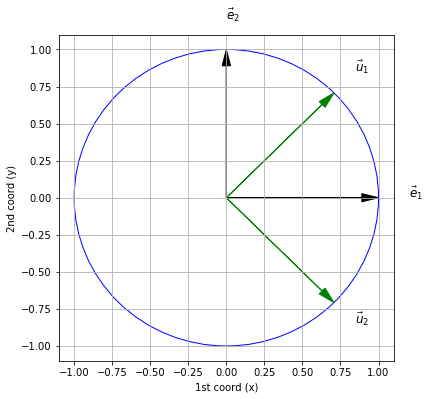

In [23]:
e1=np.array([1,0])
e2=np.array([0,1])
u1=np.array([1,1])/2**.5
u2=np.array([1,-1])/2**.5
ax=plot_arrows([[zero,e1,'k','$\\vec{e}_1$'],[zero,e2,'k','$\\vec{e}_2$'],\
                [zero,u1,'g','$\\vec{u}_1$'],[zero,u2,'g','$\\vec{u}_2$']],\
               scale=1.1,text_loc=0.2)
circ=plt.Circle((0, 0), radius=1, edgecolor='b', facecolor='None')
ax.add_patch(circ)

Using
$\vec{u_1}=\pmatrix{\frac{1}{\sqrt{2}}\  ,\frac{1}{\sqrt{2}}}$ 
and 
$\vec{u_2}=\pmatrix{\frac{1}{\sqrt{2}}\  ,\frac{-1}{\sqrt{2}}}$ 
your task is to write two functions, **project_u1** and **project_u2**. The functions should take $\vec{v}$ as an input and should then output the projection of $\vec{v}$ onto the corresponding vector.

<font  style="color:blue"> * **Code:** *</font>
```python
v = np.array([2,1])
print v
print project_u1(v)
print project_u2(v)
print type( project_u2(v) )
```


<font  style="color:magenta"> * **Output:** *</font>
```
[2 1]
[ 1.5  1.5]
[ 0.5 -0.5]
<type 'numpy.ndarray'>
```

In [24]:
# modify this cell

def project_u1(v):
    # input: v is a 2D numpy.array 
    # output: return the projection of v onto [1/sqrt(2),1/sqrt(2)]
    
    ### BEGIN SOLUTION
    u1 = np.array([1,1])/2**.5
    return u1 * np.dot(v,u1)
    ### END SOLUTION

In [25]:
# modify this cell

def project_u2(v):
    # input: v is a 2D numpy.array 
    # output: return the projection of v onto [1/sqrt(2),-1/sqrt(2)]
    
    ### BEGIN SOLUTION
    u2 = np.array([1,-1])/2**.5
    return u2 * np.dot(v,u2)
    ### END SOLUTION

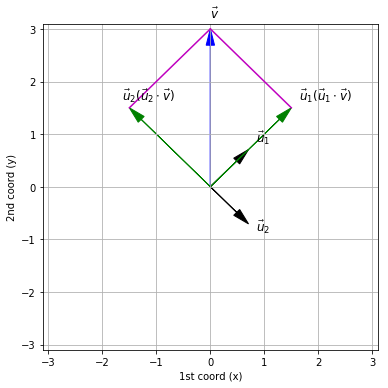

In [26]:
v = np.array([0,3])
assert type(project_u1(v)) == type(np.array([1.5,1.5]))
assert sum(abs( project_u1(v) - np.array([1.5,1.5]) )) < 10**-6
assert sum(abs( project_u2(v) - np.array([-1.5,1.5]) )) < 10**-6

u1=np.array([1,1])/2**.5
u2=np.array([1,-1])/2**.5
p1= project_u1(v)
p2= project_u2(v)
ax=plot_arrows([[zero,u1,'k','$\\vec{u}_1$'],[zero,u2,'k','$\\vec{u}_2$'],\
               [zero,v,'b','$\\vec{v}$'],\
               [zero,p1,'g',"$\\vec{u}_1(\\vec{u}_1\\cdot \\vec{v})$"],\
               [zero,p2,'g',"$\\vec{u}_2(\\vec{u}_2\\cdot \\vec{v})$"]],\
               scale=3.1,text_loc=0.2)
ax.plot([v[0],p1[0]],[v[1],p1[1]],'m');
ax.plot([v[0],p2[0]],[v[1],p2[1]],'m');

### BEGIN HIDDEN TESTS
v = np.array([-2,1])
assert sum(abs( project_u1(v) - np.array([-0.5, -0.5]) )) < 10**-6
assert sum(abs( project_u2(v) - np.array([-1.5,  1.5]) )) < 10**-6
### END HIDDEN TESTS

# Matrix Notation and Operations

[Read this notebook](http://70.95.166.175:8888/notebooks/SAFETY/probability-and-statistics-using-python/notebooks/Week%209-%20RegressionPCA/1.Linear%20Algebra%20Review.ipynb) 
before attempting exercises in this section.

In [ ]:
import pandas as pd
import numpy as np
from numpy import arange,array,ones,linalg

## Excercises

1. Write a function that takes as input an array of real numbers $a_1,a_2,\ldots,a_d$ and outputs a $d \times d$ "scaling" matrix ${\bf S}$ such that for any row vector ${\bf v} = [v_1,v_2,\ldots,v_d]$:
$$
{\bf v S} = [a_1 \times v_1,a_2 \times v_2,\ldots,a_d \times v_d]
$$
2. Write a function that takes as input an array of real numbers $a_1,a_2,\ldots,a_d$ and output the
**inverse** of ${\bf S}$, denoted ${\bf S}^{-1}$
3. Orthonormal transformation are also called **rotations**. In [2D](https://en.wikipedia.org/wiki/Rotation_matrix#In_two_dimensions), the rotation has a single rotation angle $\theta$:
$$
R(\theta) = \begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta \\
\end{bmatrix}
$$
   * Write a function that takes $\theta$ as it's input and returns the rotation matrix $R(\theta)$
   * Write a function that takes $\theta$ as it's input and returns the rotation matrix $R^{-1}(\theta)$. (hint: all you need to do is call the previous function with a different parameter).
   * Write a function that takes as input an angle $\theta$ and a list of points $(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)$, rotates the points using the matrix $R(\theta)$, plots the line connecting the rotated points, and returns the rotated points themselves.

In [64]:
A = arange(4)+1 

In [65]:
S = arange(16).reshape(4,4) + 1

In [66]:
S

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [68]:
A

array([1, 2, 3, 4])

# Solving a System of Equations

[Read this notebook](http://70.95.166.175:8888/notebooks/SAFETY/probability-and-statistics-using-python/notebooks/Week%209-%20RegressionPCA/3.Solving%20a%20system%20of%20Equations.ipynb) 
before attempting exercises in this section.

### Homework
write a function called `eqn_solution` which gets as input a 1D array `b` with 5 entries and returns the solution for the parameters $(x,y,z,s,t)$ 
for the following set of equations: 
$$
x+y+z=b[0] \\
t-y=b[1] \\
x-z=b[2] \\
y+z+s=b[3] \\
t-x=b[4]
$$

In [ ]:
A=np.array([[1,1,1,0,0],\
            [0,-1,0,0,1],\
            [1,0,-1,0,0],\
            [0,1,1,1,0],\
            [-1,0,0,0,1]])
b=np.array([1,1,1,1,1])
x,y,z,s,t=solve(A,b)
print x+y+z,t-y,x-z,y+z+s,t-x